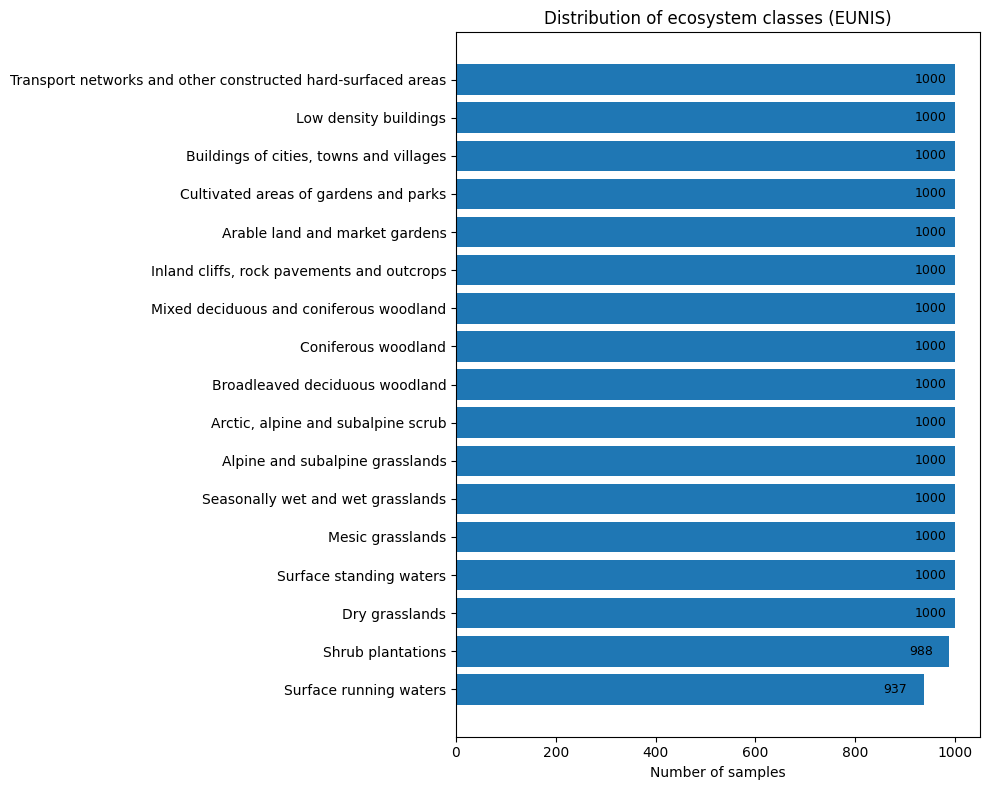

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "data/dataset_split.csv"
df = pd.read_csv(csv_path)

class_counts = (
    df.groupby(["EUNIS_cls", "EUNIS_label"])
      .size()
      .reset_index(name="count")
      .sort_values("count", ascending=True)
)

plt.figure(figsize=(10, 8))
bars = plt.barh(class_counts["EUNIS_label"], class_counts["count"])

plt.xlabel("Number of samples")
plt.title("Distribution of ecosystem classes (EUNIS)")

# Add value labels
for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        width - 80,          # small offset to the right
        y,
        f"{int(width)}",
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()


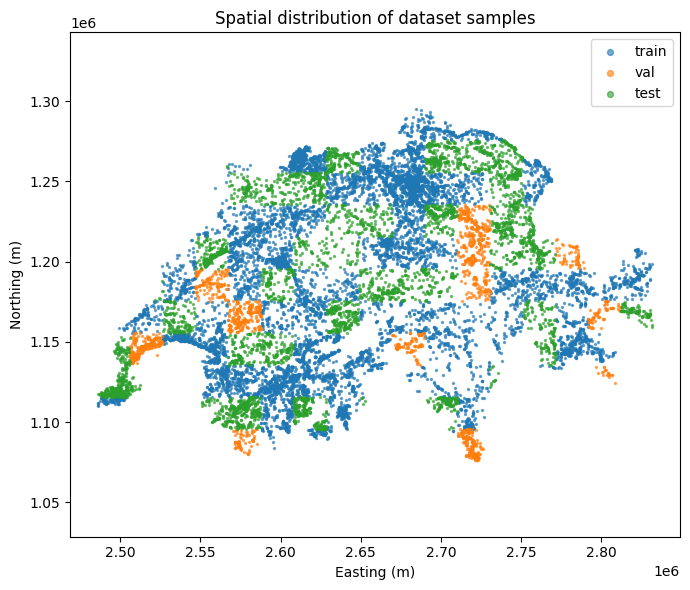

In [5]:
split_colors = {
    "train": "tab:blue",
    "val": "tab:orange",
    "test": "tab:green",
}

plt.figure(figsize=(7, 6))

for split, color in split_colors.items():
    subset = df[df["split"] == split]
    plt.scatter(
        subset["x"],
        subset["y"],
        s=2,
        alpha=0.6,
        label=split,
        color=color
    )

plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Spatial distribution of dataset samples")
plt.legend(markerscale=3)
plt.axis("equal")
plt.tight_layout()
plt.show()

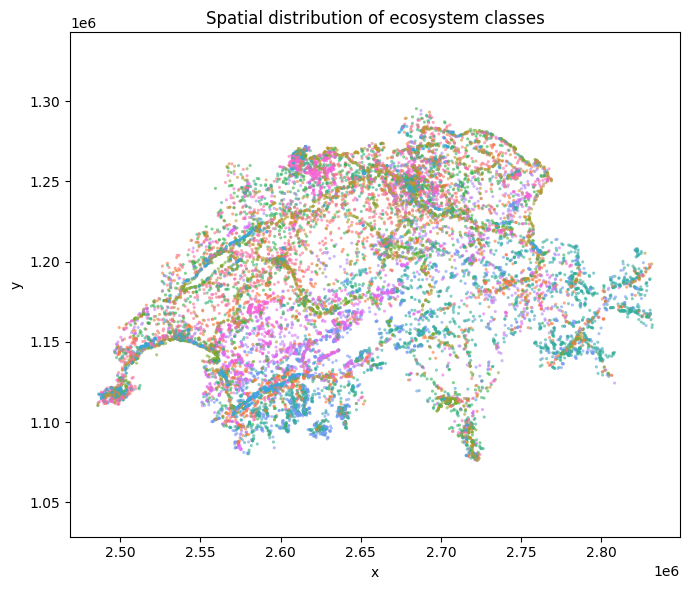

In [8]:
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df,
    x="x",
    y="y",
    hue="EUNIS_label",
    s=5,
    linewidth=0,
    alpha=0.6,
    legend=False
)
plt.title("Spatial distribution of ecosystem classes")
plt.axis("equal")
plt.tight_layout()
plt.show()
